# 당뇨병 예측을 위한 머신러닝

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
df = pd.read_csv('diabetes.csv', index_col='Pregnancies')


print(df.head())

             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1  


# 로지스틱 회귀

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df)

X, y = make_classification(n_samples=1000, n_features=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       102
           1       0.86      0.89      0.87        98

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



# 서포트 벡터 머신

In [31]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       102
           1       0.88      0.87      0.87        98

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



# 결정트리분류기

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       102
           1       0.87      0.88      0.87        98

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



# 시각화 (결정트리분류기-AdaBoost)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


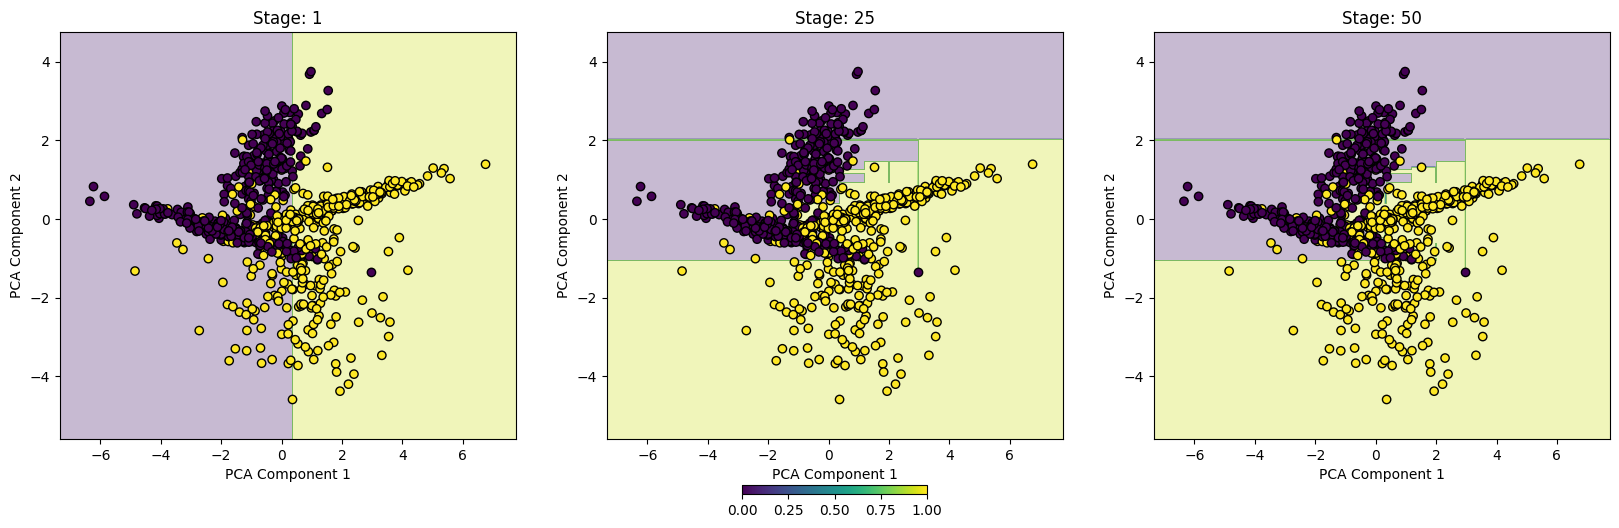

In [33]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 2)
X_train_reduced = pca.fit_transform(X_train)

base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
step = [1, 25, 50]  # 각 부스팅 단계

for idx, stage in enumerate(step):
    model.n_estimators = stage
    model.fit(X_train_reduced, y_train)

    # 결정 경계 시각화
    x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
    y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = axes[idx].scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', edgecolor='k')
    axes[idx].set_title(f'Stage: {stage}')
    axes[idx].set_xlabel('PCA Component 1')
    axes[idx].set_ylabel('PCA Component 2')

plt.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
plt.show()

# plot_importance

XGBoost 분류기 정확도: 0.69
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        99
           1       0.56      0.64      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:04:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

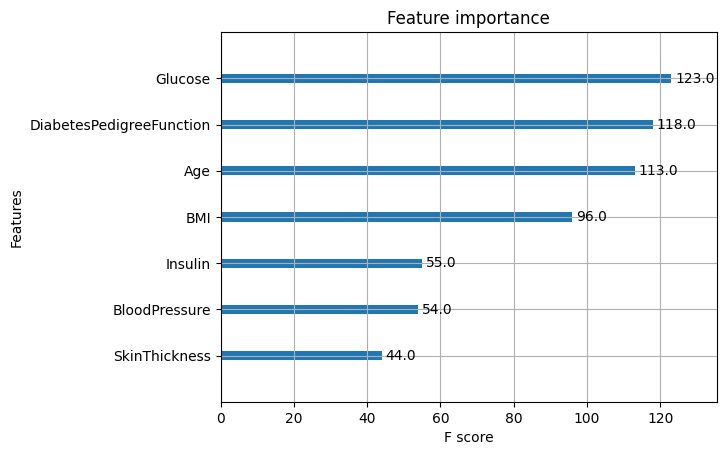

In [35]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

X, y = df.drop(columns=['Outcome']), df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost 분류기 정확도: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))

feature_names = X.columns.tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

plt.figure(figsize=(10, 8))
plot_importance(model_xgb)
plt.show()